<a href="https://colab.research.google.com/github/JayMyong66/class2022spring/blob/main/20220328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국가별 입국허가요건 (여권정보) 조회 서비스

### 외교부_국가·지역별 입국허가요건 데이터를 활용하여 국가별 여권정보를 조회할 수 있습니다.

오픈 API 정보 : https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15075345

In [1]:
!pip install gradio
import gradio as gr
import requests
import pandas as pd

     |████████████████████████████████| 1.7 MB 4.2 MB/s 
     |████████████████████████████████| 53 kB 381 kB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 211 kB 71.8 MB/s 
     |████████████████████████████████| 255 kB 54.6 MB/s 
     |████████████████████████████████| 1.1 MB 35.7 MB/s 
     |████████████████████████████████| 2.0 MB 7.8 MB/s 
     |████████████████████████████████| 84 kB 1.2 MB/s 
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 271 kB 20.8 MB/s 
     |████████████████████████████████| 144 kB 54.8 MB/s 
     |████████████████████████████████| 10.9 MB 42.3 MB/s 
     |████████████████████████████████| 58 kB 4.9 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 3.6 MB 42.7 MB/s 
     |████████████████████████████████| 61 kB 432 kB/s 
     |█████████████████████████

In [2]:
def dfMaker(country):
    # URL에 국가를 변수로 받아서 국가별 정보를 받을 수 있도록
    URL = ('http://apis.data.go.kr/1262000/EntranceVisaService2/getEntranceVisaList2?'
        'serviceKey=GIT3q%2FIzFNW%2FS5usWTo6GD5BhL5qmOaQpQAmTSyTgJRXBy7N36wRhK7nSd3%2FXcsJekC8qhP6ZswbVxXTfoHIXQ%3D%3D'
        '&pageNo=1'
        '&numOfRows=10'
        '&cond[country_nm::EQ]='+country
        )
    response = requests.get(URL)
    r = response.json()

    # data 내부의 필요한 정보들을 dataframe으로 전환
    items = r['data']
    country_nm = items[0]['country_nm']
    dplmt_pspt_visa_cn = items[0]['dplmt_pspt_visa_cn']
    gnrl_pspt_visa_cn = items[0]['gnrl_pspt_visa_cn']
    ofclpspt_visa_cn = items[0]['ofclpspt_visa_cn']
    nvisa_entry_evdc_cn = items[0]['nvisa_entry_evdc_cn']
    remark = items[0]['remark']

    df = pd.DataFrame({'국가':country_nm,'일반여권':gnrl_pspt_visa_cn,'관용여권':ofclpspt_visa_cn,'외교관여권':ofclpspt_visa_cn,'무비자입국':nvisa_entry_evdc_cn,'비고':remark},index=[0])

    return df

In [3]:
# 조회하고 싶은 국가를 dropdown 메뉴에서 선택하게하고 , 선택한 국가의 여권정보를 dataframe 형태로 출력
iface = gr.Interface(dfMaker, gr.inputs.Dropdown(['가봉', '과테말라', '그리스', '뉴질랜드', '노르웨이', '네덜란드', '대만', '덴마크', '독일', '라오스', '러시아','루마니아', '마카오', '말레이시아', '멕시코','몽골','미합중국','베트남','스웨덴','스위스','스페인','싱가포르','영국','오스트리아','우크라이나','이탈리아','일본', '중국','칠레','캐나다','콜롬비아','태국','터키','프랑스','필리핀','호주','홍콩'],label='국가 선택'), outputs=['dataframe'],description='가고싶은 나라의 여권 정보를 보여드립니다!')
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://48240.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f7efeed0650>,
 'http://127.0.0.1:7860/',
 'https://48240.gradio.app')

# (예시화면)

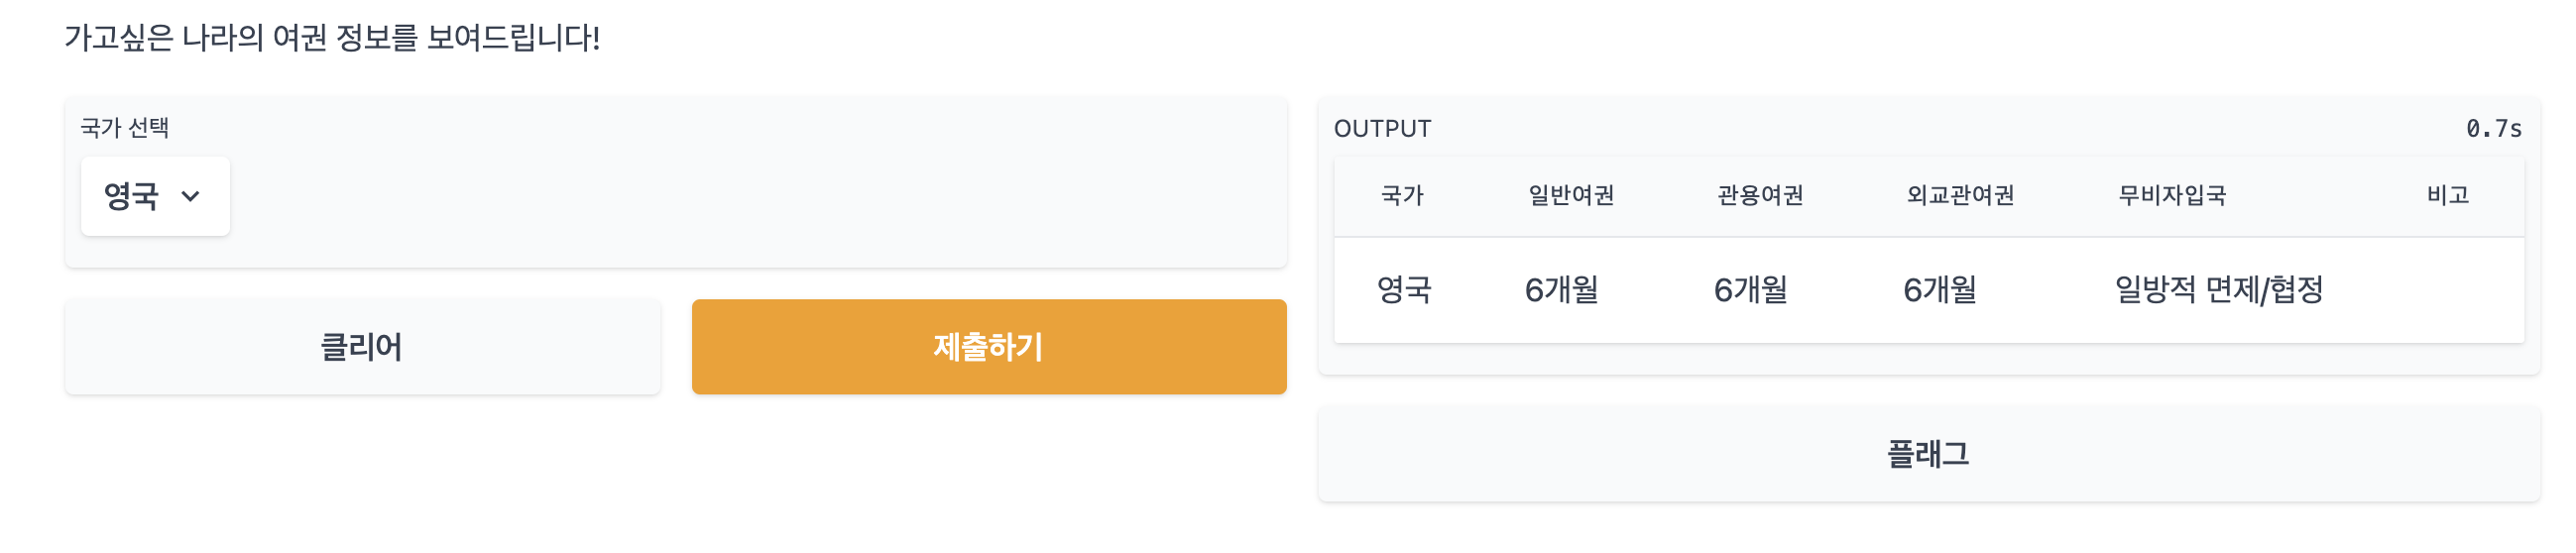

## API request parameter 정보

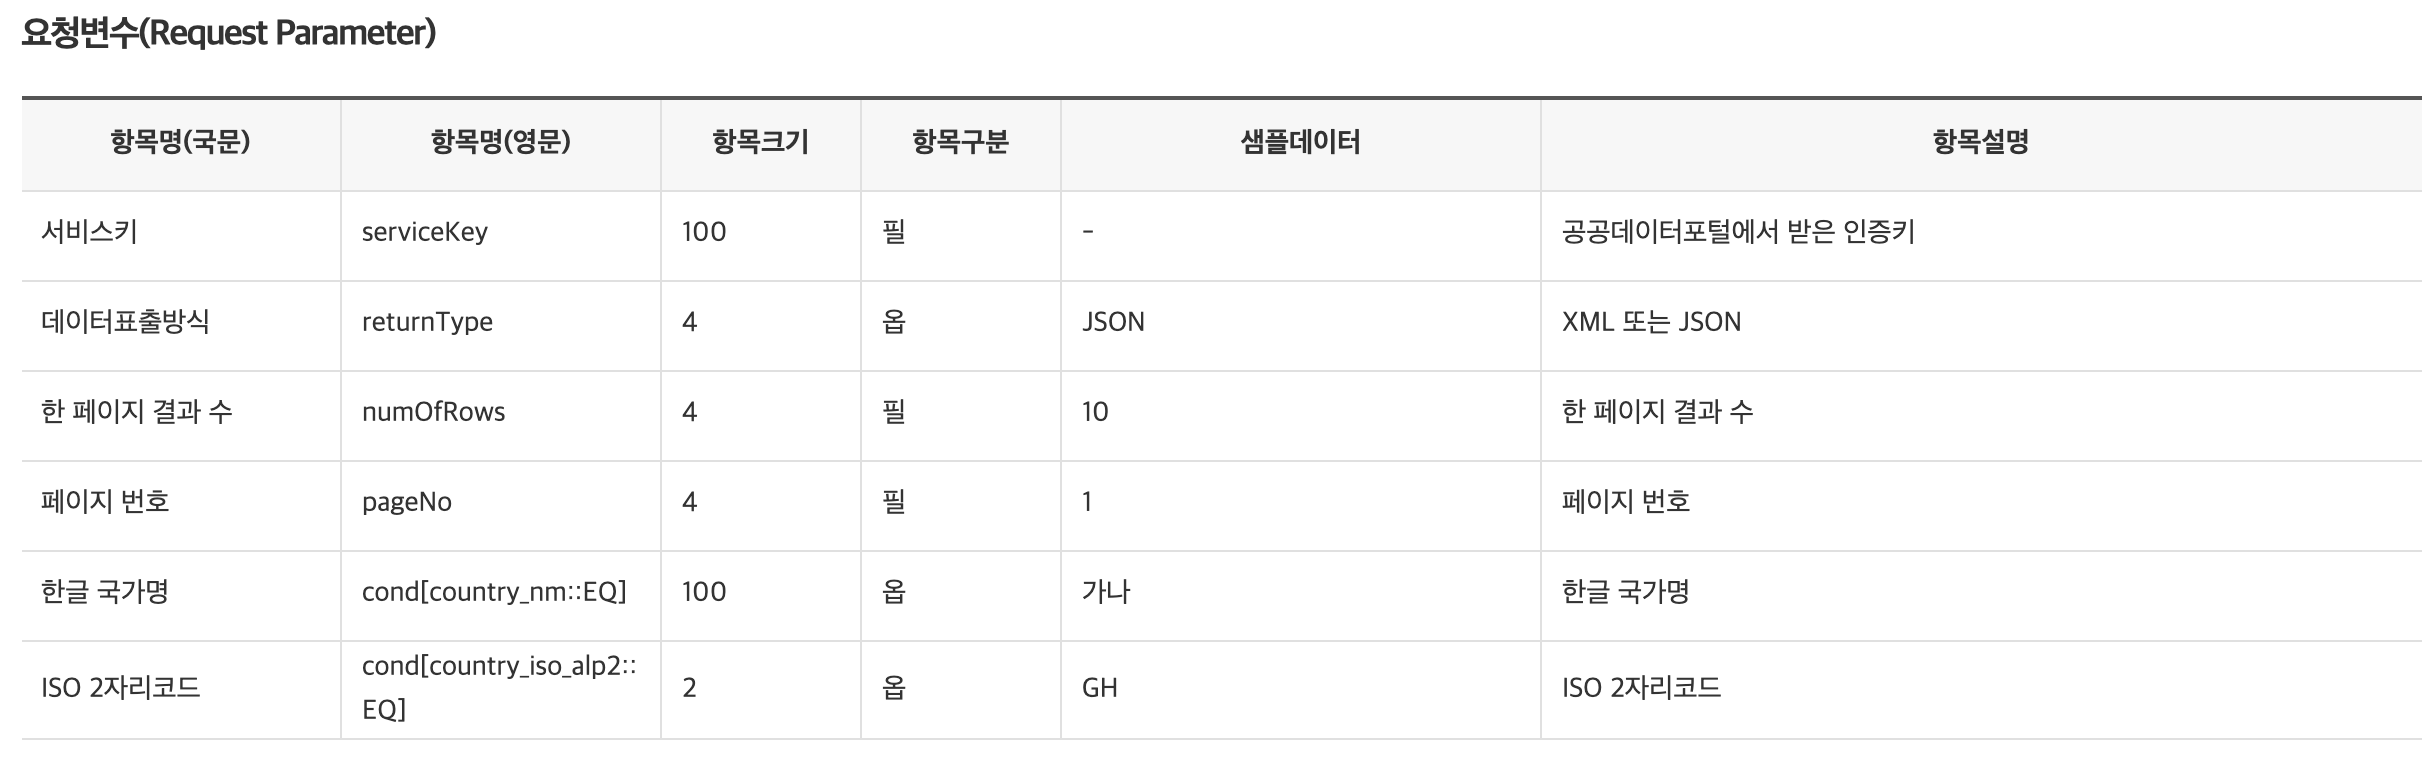

## API response 정보

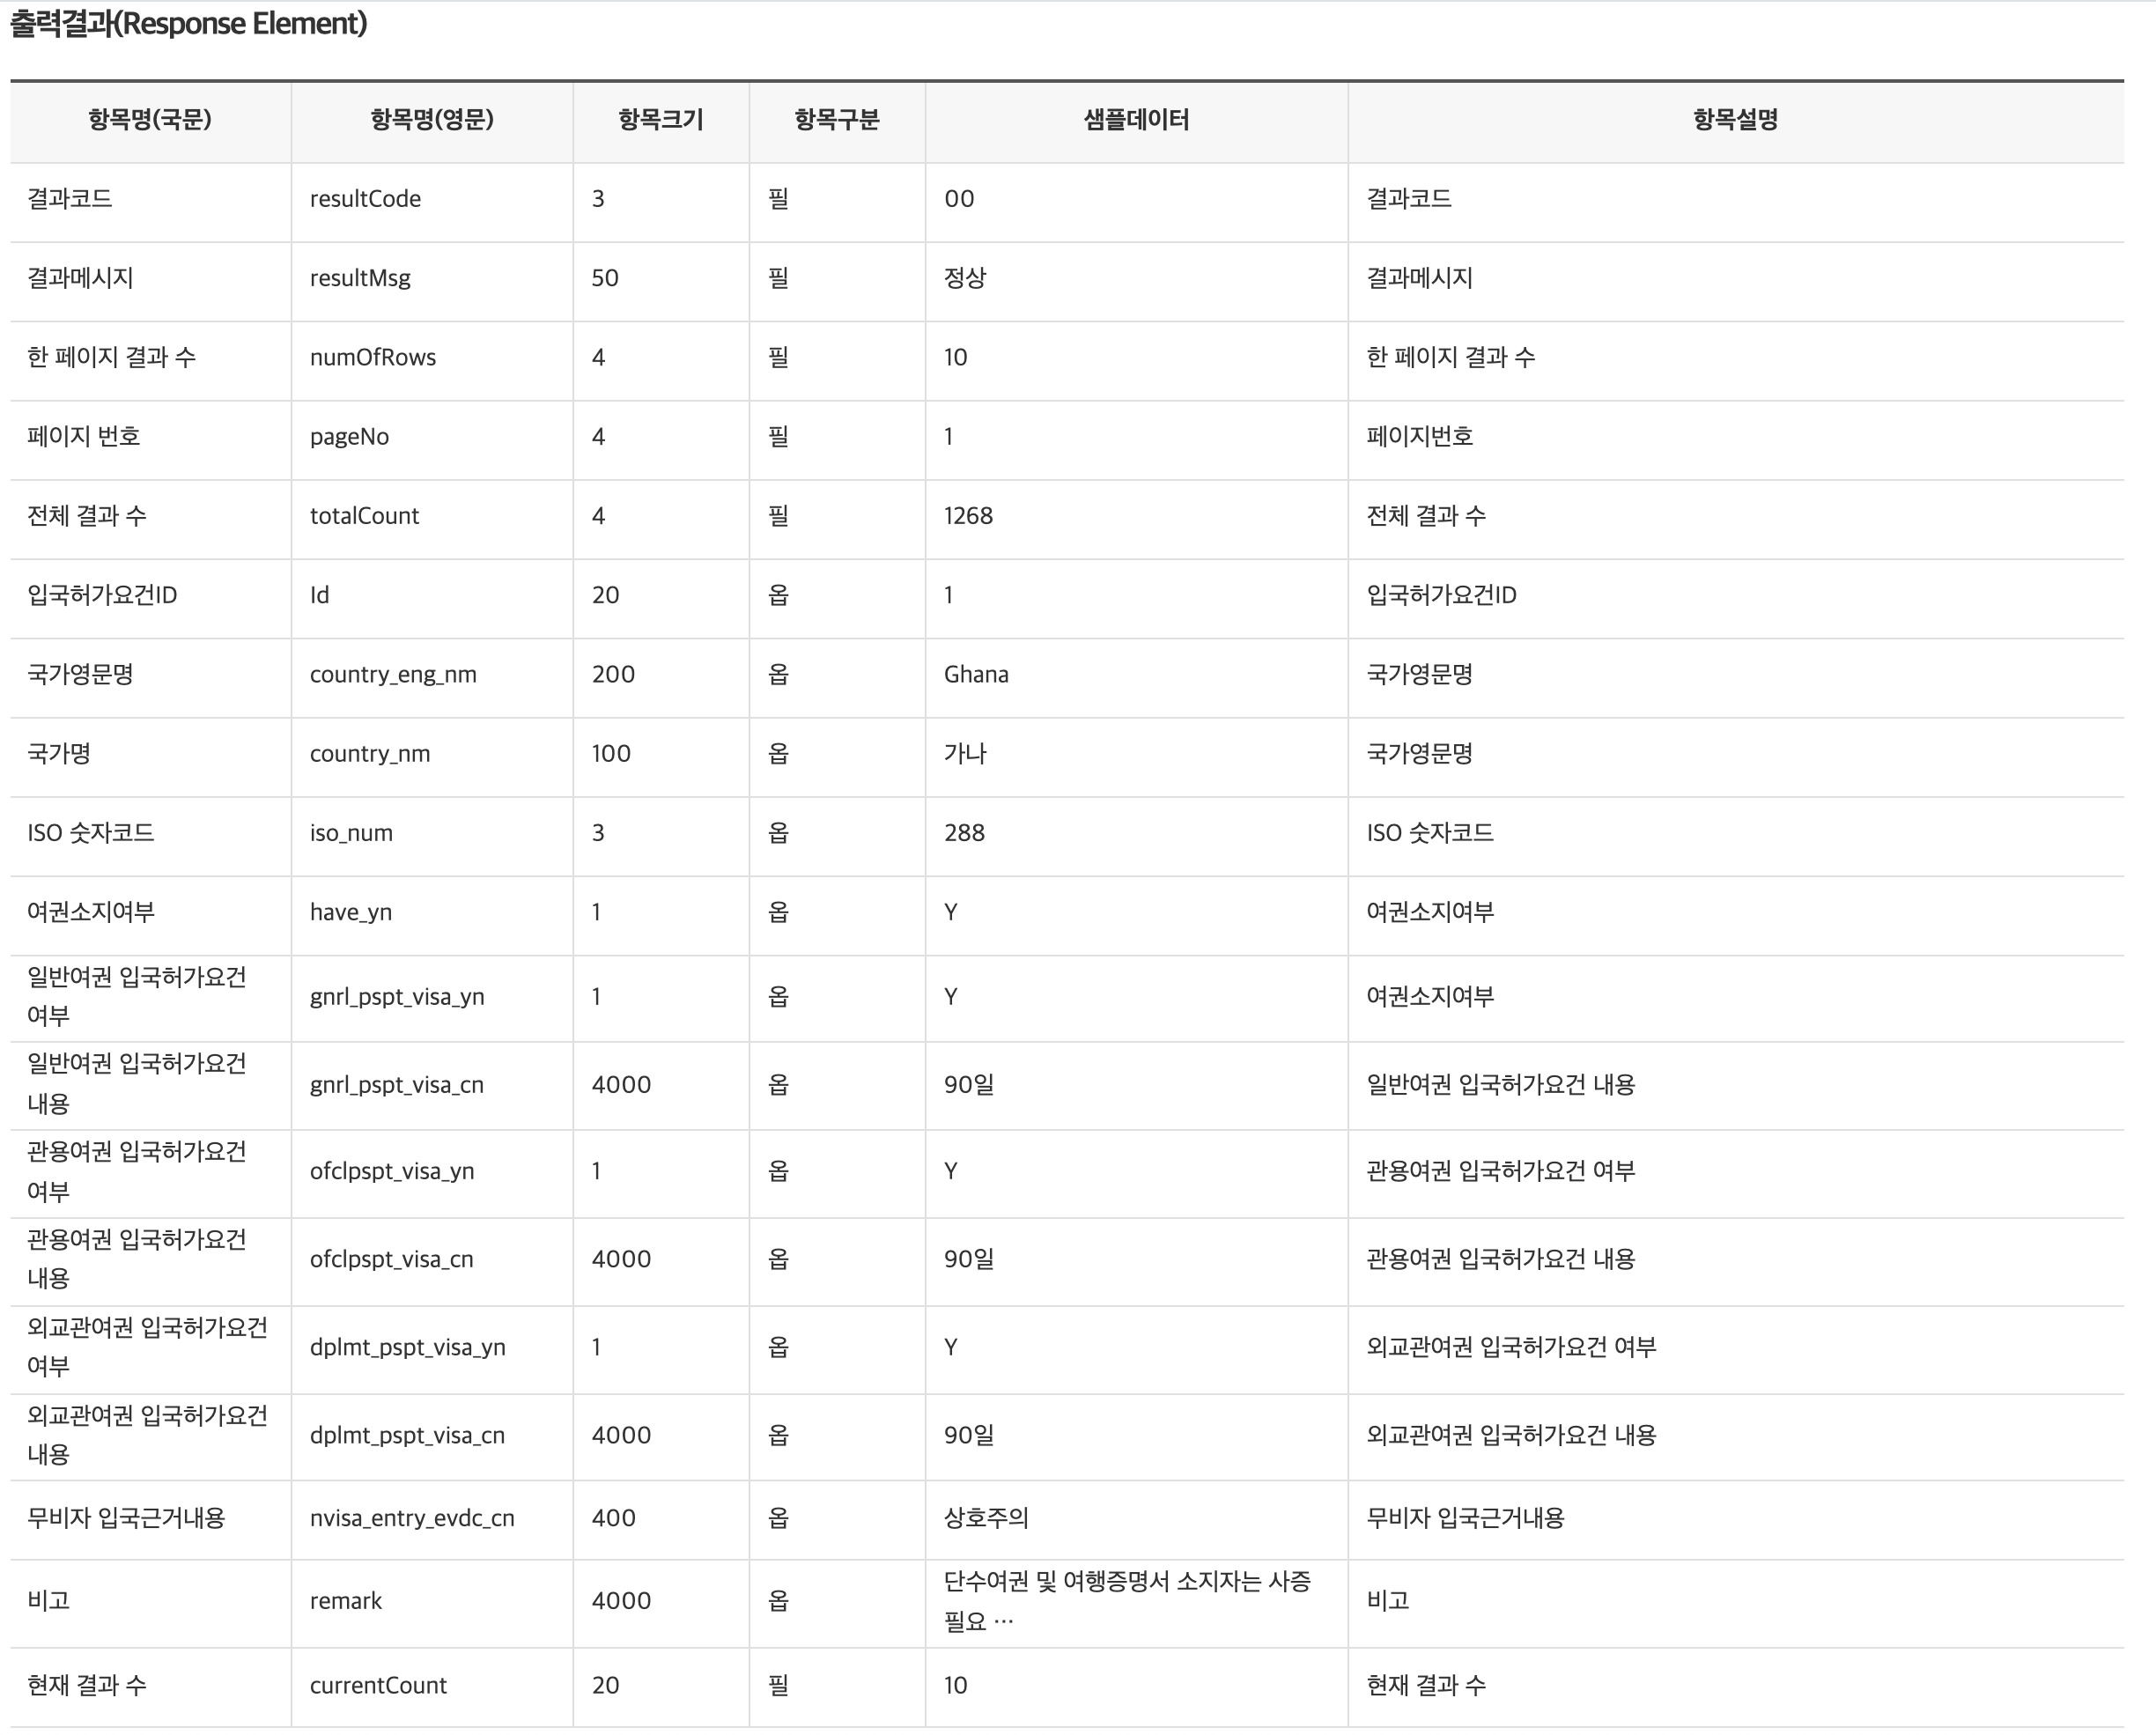